In [159]:
import pandas as pd

In [160]:
df = pd.read_csv('/content/Energy Dataset.xlsx - Energy Dataset.csv')

In [161]:
df.head(1)

,X1,X2,X3,X4,X5,X6,X7,X8,Heating Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55


In [162]:
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Heating Load'], dtype='object')

In [163]:
df.shape

(768, 9)

In [164]:
df.dtypes

X1              float64
X2              float64
X3              float64
X4              float64
X5              float64
X6                int64
X7              float64
X8                int64
Heating Load    float64
dtype: object

In [165]:
df.isnull().sum()

X1              0
X2              0
X3              0
X4              0
X5              0
X6              0
X7              0
X8              0
Heating Load    0
dtype: int64

In [166]:
df.isnull().sum().sum()

0

In [167]:
df.rename(columns={'Heating Load':'Heating_Load'},inplace=True)

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
X=df.iloc[:,:-1]

In [170]:
X.head()

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0


In [171]:
y=df['Heating_Load']

In [172]:
y.head()

0    15.55
1    15.55
2    15.55
3    15.55
4    20.84
Name: Heating_Load, dtype: float64

In [173]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,test_size=0.2,random_state=2)

In [174]:
X_train.shape

(614, 8)

In [175]:
X_test.shape

(154, 8)

In [176]:
y_train.shape

(614,)

In [177]:
y_test.shape

(154,)

In [178]:
from sklearn.linear_model import LinearRegression

In [179]:
linear_regression = LinearRegression()

In [180]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [181]:
Heating_load_predict = linear_regression.predict(X_test)

In [182]:
Heating_load_predict

array([28.8231691 , 27.22114433, 33.65058415, 17.78919689, 36.31975277,
       18.24835162, 13.81085162, 33.35084899, 11.292767  , 13.45218337,
       12.72337675, 12.36849319, 30.48421674, 33.05668037, 28.41212146,
       27.991014  , 31.77721542, 33.84451626, 16.24502827, 12.91250803,
       14.6772693 , 31.19623026, 16.37799548, 24.94832288, 30.35248026,
       25.1981691 , 11.49829082, 31.64007996, 17.59210162, 27.82981259,
       19.02612449, 34.49750371, 32.23258546,  9.06411417, 13.37962675,
       12.00641181, 27.45768516, 30.99070644, 35.06975277, 16.17247166,
       12.41281559, 28.66196768, 26.16336276, 10.72383809, 12.25625803,
       27.01562052, 15.41582817,  8.76592787, 37.45945644, 29.647264  ,
       32.07138404,  9.92588799,  6.81535547, 30.24116778, 28.19653782,
       35.86438273, 31.55143516, 15.21030435, 29.61779906, 15.20566049,
       27.90369292, 36.23110797, 30.65221542, 31.35610797, 19.1147693 ,
       35.11407517, 37.32648924,  9.51948421, 30.78385891, 30.85

In [183]:
from sklearn.metrics import r2_score

In [184]:
score=r2_score(y_test,Heating_load_predict)

In [185]:
print(score)

0.8952522756928316


In [186]:
from sklearn.metrics import mean_squared_error

In [187]:
MSE= mean_squared_error(y_test,Heating_load_predict)

In [188]:
print(MSE)

9.759496185692763


In [189]:
#PolynomialRegression

In [190]:
from sklearn.preprocessing import PolynomialFeatures

In [191]:
poly=PolynomialFeatures(degree=6)

In [192]:
X_poly_train=poly.fit_transform(X_train)

In [193]:
X_poly_test=poly.transform(X_test)

In [194]:
poly.fit(X_poly_train,y_train)

PolynomialFeatures(degree=6)

In [195]:
linear_regression.fit(X_poly_train,y_train)

LinearRegression()

In [196]:
y_pred=linear_regression.predict(X_poly_test)

In [197]:
MSE1= mean_squared_error(y_test,y_pred)

In [198]:
print(MSE1)

0.2637523216962996


In [199]:
score1=r2_score(y_test,y_pred)

In [200]:
print(score1)

0.9971691719579827


In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

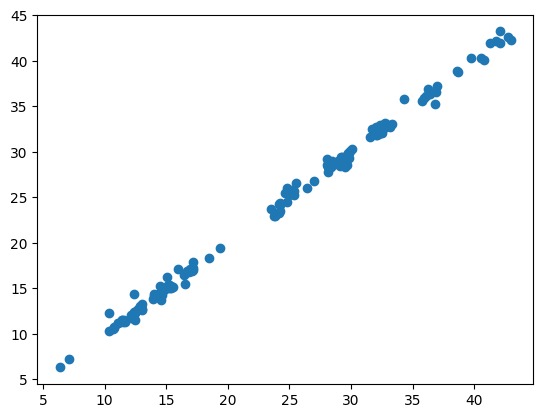

In [203]:
plt.scatter(y_test,y_pred)


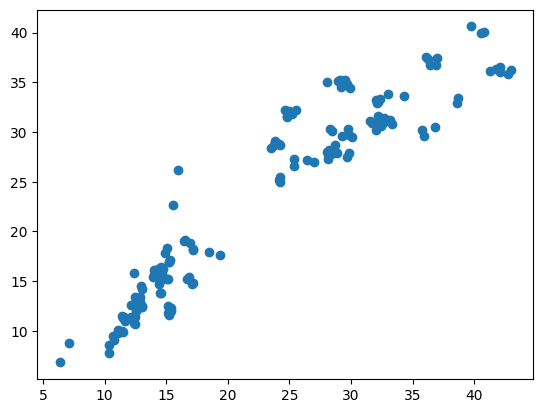

In [207]:
plt.scatter(y_test,Heating_load_predict)

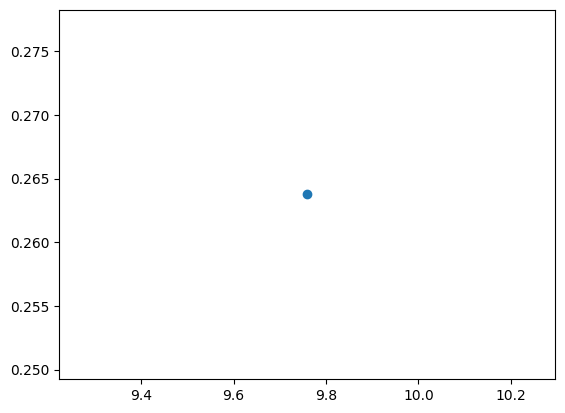

In [208]:
plt.scatter(MSE,MSE1)

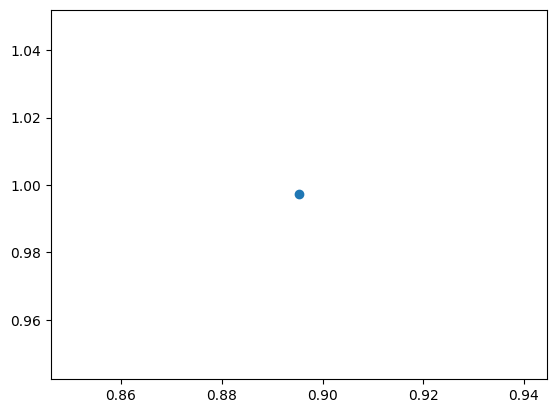

In [209]:
plt.scatter(score,score1)